<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

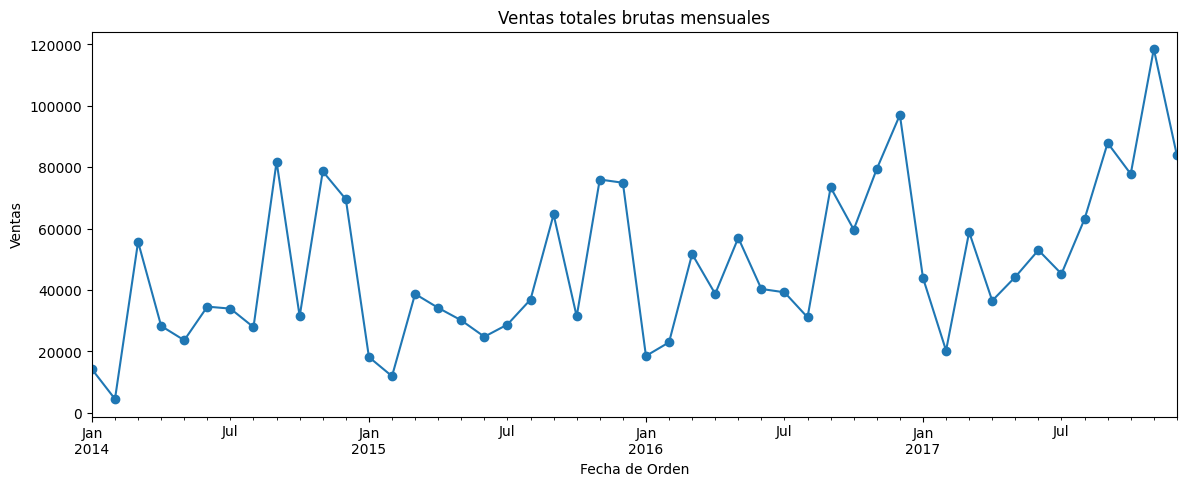

C:\Users\user\AppData\Local\Temp\ipykernel_20176\2961848989.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_region.values, y=top_region.index, palette='crest')


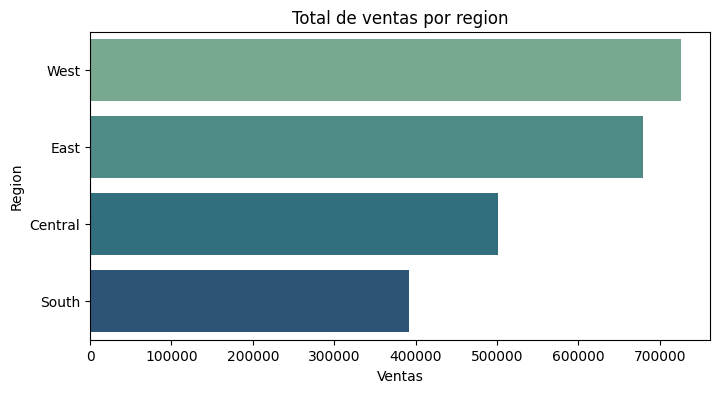

C:\Users\user\AppData\Local\Temp\ipykernel_20176\2961848989.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ventas_estados.values, y=top_ventas_estados.index, palette='crest')


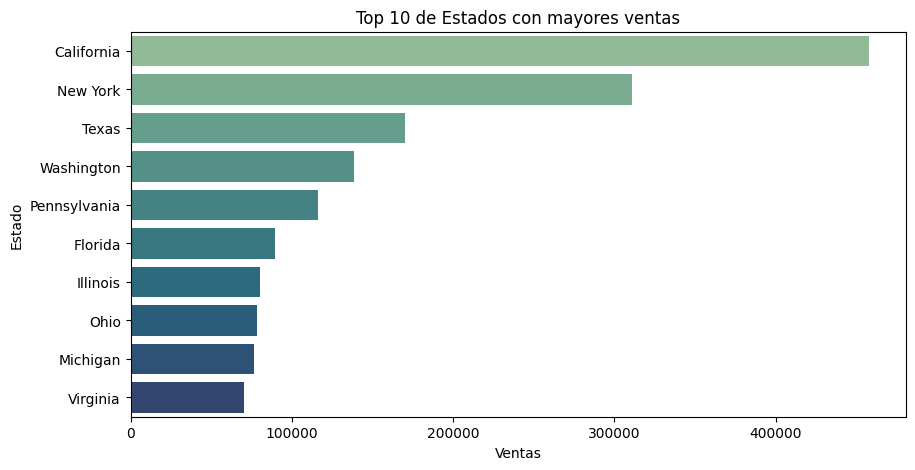

C:\Users\user\AppData\Local\Temp\ipykernel_20176\2961848989.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ventas_ciudad.values, y=top_ventas_ciudad.index, palette='crest')


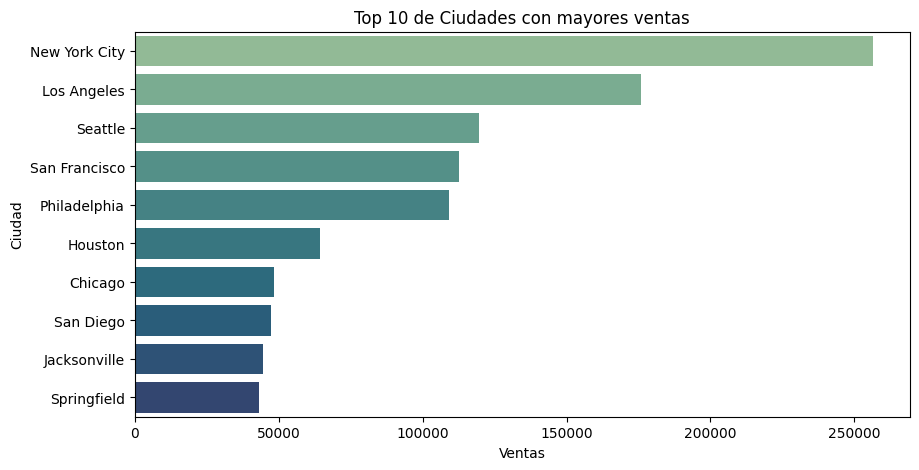

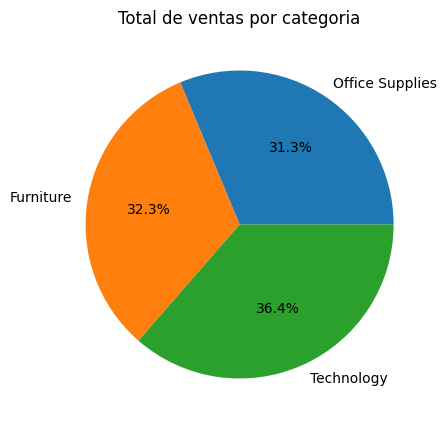

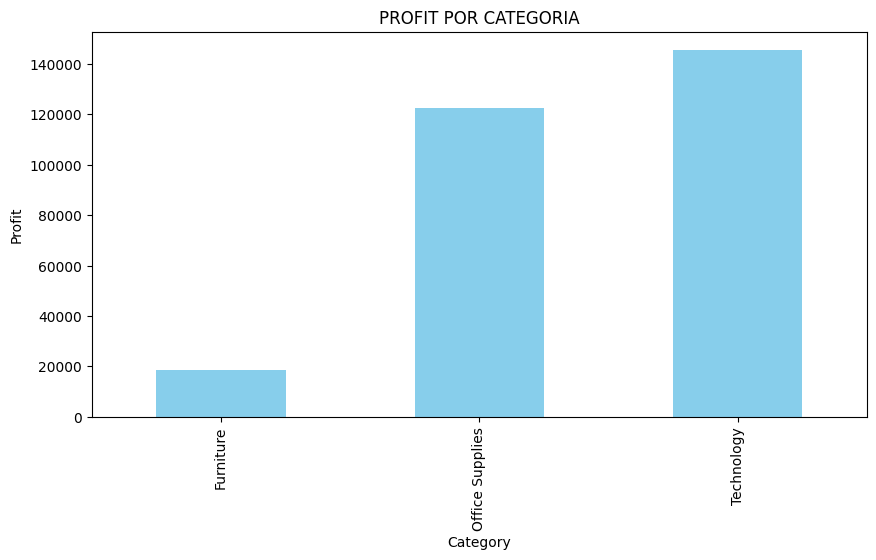

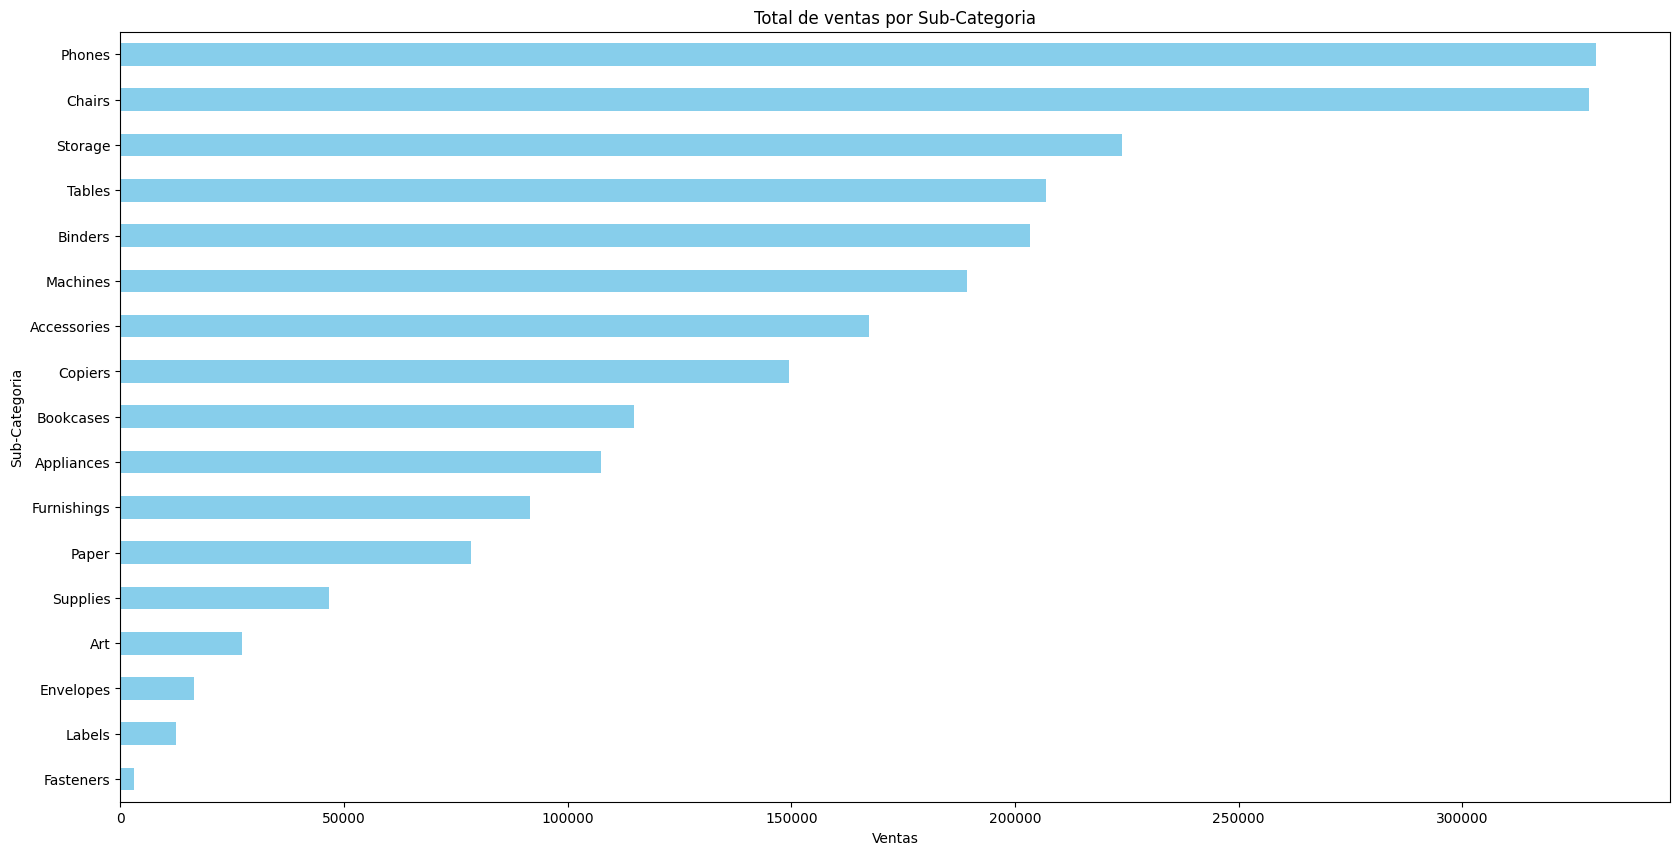

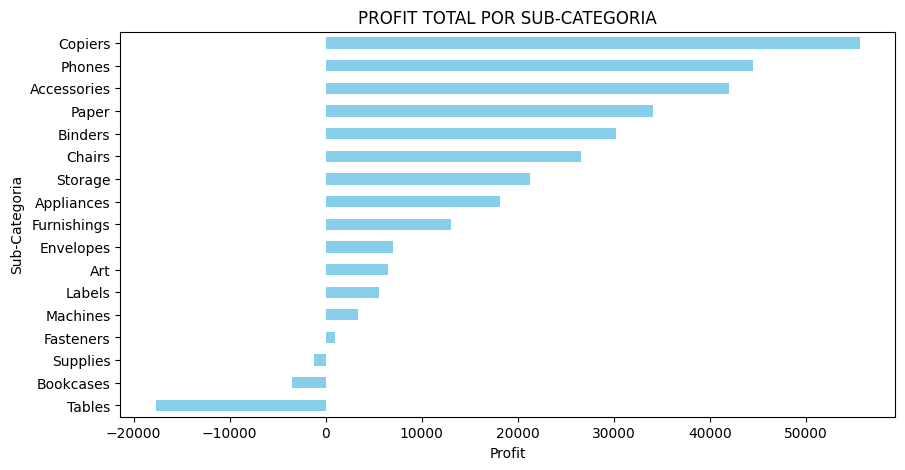

C:\Users\user\AppData\Local\Temp\ipykernel_20176\2961848989.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_clientes.values, y=top_clientes.index, palette="crest")


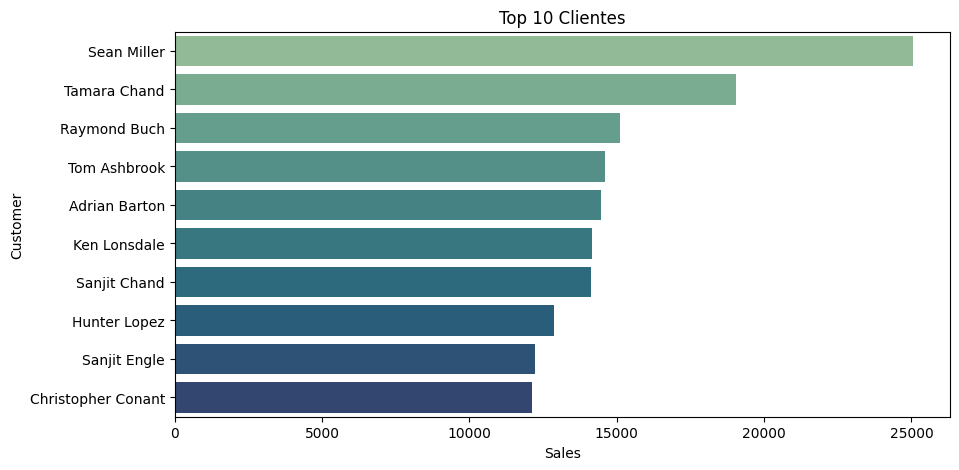

C:\Users\user\AppData\Local\Temp\ipykernel_20176\2961848989.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_clientes_profit.values, y=top_clientes_profit.index, palette='crest')
C:\Users\user\AppData\Local\Temp\ipykernel_20176\2961848989.py:129: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ventas_mensuales_por_periodo= (data.set_index('Order Date').resample('M')['Sales'].sum().sort_index())
C:\Users\user\AppData\Local\Temp\ipykernel_20176\2961848989.py:130: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  profit_mensual_por_categoria= (data.set_index('Order Date').resample('M')['Profit'].sum().sort_index())



- Temporadas fuertes **Picos en el mes de Diciembre**; **Mejores meses:** 2017 - 11, 2016 - 12, 2017 - 09, 2017 - 12, 2014 - 09.
- West: Clientes potenciales por ventas; Technology **es la categoria Top**.
- **Tiempo promedio de envio=** 3.96 dias.
- **Total ventas:** 2,297,200.86 - **Total Profit:** 286,397.02.
- **Resultado RFM:** Cliente Excelente 24% - Cliente Fiel28% - Cliente Prometedor23% - Cliente en riesgo25%


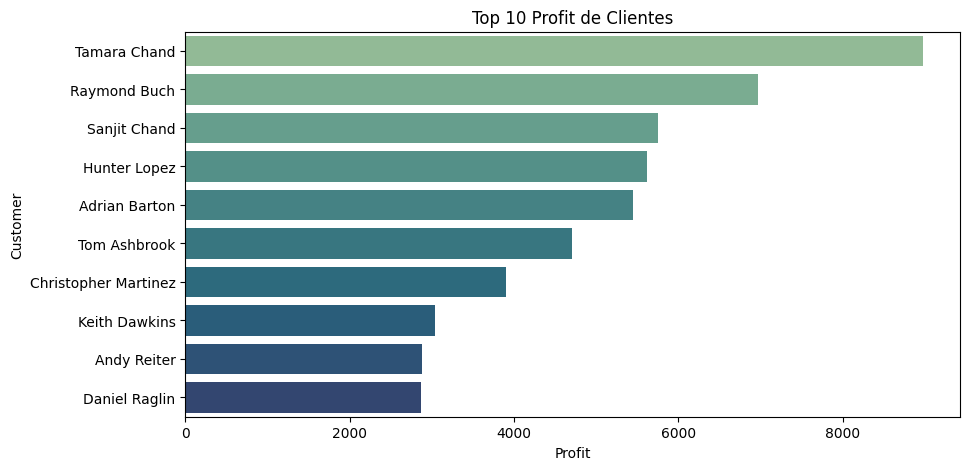

In [2]:
import numpy as pd
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math
from IPython.display import Markdown, display


data= pd.read_csv('C://Users/user/Desktop/SampleSuperstore.csv', encoding="latin1")
#Obtengo la informacion de mi data frame 
print(data.info())

#Verifico si existen valores nulos 
print(data.isnull().sum())



#Conversion a Datetime
data['Order Date']= pd.to_datetime(data['Order Date'])
data['Ship Date']= pd.to_datetime(data['Ship Date'])

#Calculamos el ingreso total aplicando descuentos
data['ingreso_total']= data['Sales'] * (1 - data['Discount'])

#Calculamos el porcentaje de ganancia 
data['margen_ganancia']= data['Sales'] / data['Quantity']

print(data['ingreso_total'])
print(data['margen_ganancia'])

data['YearMonth']=data['Order Date'].dt.to_period('M')
data['OrderY']=data['Order Date'].dt.year
data['OrderM']=data['Order Date'].dt.month

sales_month= data.groupby('YearMonth')['Sales'].sum()
plt.figure(figsize=(14,5))
sales_month.plot(marker='o')
plt.title('Ventas totales brutas mensuales')
plt.xlabel('Fecha de Orden')
plt.ylabel('Ventas')
plt.show()

#Total de Ventas por Region 
top_region= data.groupby('Region')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x=top_region.values, y=top_region.index, palette='crest')
plt.title('Total de ventas por region')
plt.xlabel('Ventas')
plt.ylabel('Region')
plt.show()

#Total de Ventas por Estado 
top_ventas_estados= data.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_ventas_estados.values, y=top_ventas_estados.index, palette='crest')
plt.title('Top 10 de Estados con mayores ventas')
plt.xlabel('Ventas')
plt.ylabel('Estado')
plt.show()

#Total de Vnetas por Ciudad 
top_ventas_ciudad= data.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_ventas_ciudad.values, y=top_ventas_ciudad.index, palette='crest')
plt.title('Top 10 de Ciudades con mayores ventas')
plt.xlabel('Ventas')
plt.ylabel('Ciudad')
plt.show()

#Analisis de ventas por categorias 
ventas_categoria= data.groupby('Category')['Sales'].sum().sort_values()
plt.figure(figsize=(10,5))
ventas_categoria.plot(kind='pie', autopct='%1.1f%%', title= 'Total de ventas por categoria')
plt.ylabel('')
plt.show()

# Analisis de Profit por categoria 
profit_por_categoria= data.groupby('Category')['Profit'].sum().sort_values()
plt.figure(figsize=(10,5))
profit_por_categoria.plot(kind='bar', color='skyblue', title= 'PROFIT POR CATEGORIA')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show()

#Analisis de ventas por subcategorias 
ventas_subcategorias= data.groupby('Sub-Category')['Sales'].sum().sort_values()
plt.figure(figsize=(20,10))
ventas_subcategorias.plot(kind='barh', color= 'skyblue')
plt.title('Total de ventas por Sub-Categoria')
plt.xlabel('Ventas')
plt.ylabel('Sub-Categoria')
plt.show()

#Analisis de Profit por Sub categorias
pfit_por_subcategoria= data.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=True)
plt.figure(figsize=(10,5))
pfit_por_subcategoria.plot(kind='barh', color='skyblue')
plt.title('PROFIT TOTAL POR SUB-CATEGORIA')
plt.xlabel('Profit')
plt.ylabel('Sub-Categoria')
plt.show()

#Analisis de los principales clientes 
top_clientes= data.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_clientes.values, y=top_clientes.index, palette="crest")
plt.title('Top 10 Clientes')
plt.xlabel('Sales')
plt.ylabel('Customer')
plt.show()

#Analisis de Profit de los principales clientes
top_clientes_profit= data.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_clientes_profit.values, y=top_clientes_profit.index, palette='crest')
plt.title('Top 10 Profit de Clientes')
plt.xlabel('Profit')
plt.ylabel('Customer')
plt.show

#Analisis RFM (Recency, Frequency, Monetary)

# Diccionario KPI
kpi={}
kpi['Total_ventas']= float(data['Sales'].sum())
kpi['Total_profit']= float(data['Profit'].sum())
kpi['Dias_promedio_envio']= (data['Ship Date']- data['Order Date']).dt.days.clip(lower=0).mean()

ventas_mensuales_por_periodo= (data.set_index('Order Date').resample('M')['Sales'].sum().sort_index())
profit_mensual_por_categoria= (data.set_index('Order Date').resample('M')['Profit'].sum().sort_index())

kpi['top_mes_venta']=(ventas_mensuales_por_periodo.sort_values(ascending=False).head(5).index.strftime('%Y - %m').tolist())
kpi['top_region']= data.groupby('Region')['Sales'].sum().idxmax()
kpi['top_categoria']= data.groupby('Category')['Sales'].sum().idxmax()

hoy= data['Order Date'].max()+ pd.Timedelta(days=1)
rfm= data.groupby('Customer ID').agg(
    Recency= ('Order Date', lambda x: (hoy - x.max()).days),
    Frecuency= ('Order ID', 'nunique'),
    Monetary=('Sales','sum')
).reset_index()

rfm['Puntaje_R']= pd.qcut(rfm['Recency'],4, labels=[4,3,2,1])
rfm['Puntaje_F']= pd.qcut(rfm['Frecuency'].rank(method='first'),4,labels=[1,2,3,4])
rfm['Puntaje_M']=pd.qcut(rfm['Monetary'],4,labels=[1,2,3,4])
rfm[['Puntaje_R','Puntaje_F','Puntaje_M']]= rfm[['Puntaje_R','Puntaje_F','Puntaje_M']].astype(int)
rfm['RFM_Sum']=rfm[['Puntaje_R','Puntaje_F','Puntaje_M']].sum(axis=1)

def seg(s):
    if s>= 10: return 'Cliente Excelente'
    if s>= 8: return 'Cliente Fiel'
    if s>= 6: return 'Cliente Prometedor'
    return'Cliente en riesgo'

rfm['Segmento']= rfm['RFM_Sum'].apply(seg)
porcentaje_clientes_rfm=(rfm['Segmento'].value_counts(normalize=True)*100).round(0).astype(int)
for g in ['Cliente Excelente', 'Cliente Fiel', 'Cliente Prometedor', 'Cliente en riesgo']:
    if g not in porcentaje_clientes_rfm:porcentaje_clientes_rfm.loc[g]=0
    porcentaje_clientes_rfm=porcentaje_clientes_rfm[['Cliente Excelente', 'Cliente Fiel', 'Cliente Prometedor', 'Cliente en riesgo']]

summary= f"""
- Temporadas fuertes **Picos en el mes de Diciembre**; **Mejores meses:** {", ".join(kpi['top_mes_venta'])}.
- {kpi['top_region']}: Clientes potenciales por ventas; {kpi['top_categoria']} **es la categoria Top**.
- **Tiempo promedio de envio=** {kpi['Dias_promedio_envio']:,.2f} dias.
- **Total ventas:** {kpi['Total_ventas']:,.2f} - **Total Profit:** {kpi['Total_profit']:,.2f}.
- **Resultado RFM:** Cliente Excelente {porcentaje_clientes_rfm['Cliente Excelente']}% - Cliente Fiel{porcentaje_clientes_rfm['Cliente Fiel']}% - Cliente Prometedor{porcentaje_clientes_rfm['Cliente Prometedor']}% - Cliente en riesgo{porcentaje_clientes_rfm['Cliente en riesgo']}%
"""
display(Markdown(summary))

